In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json
Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [23]:
!cp kaggle.json ~/.kaggle/

In [24]:
!chmod 600 /root/.kaggle/kaggle.json

In [25]:
!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023            Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          11995        397  1.0              
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           1836         73  1.0              
iamsouravbanerjee/airline-dataset                          Airline Dataset                                  4MB  2023-08-30 12:03:12            746         23  1.0              
omikumarmakadia2121/100-largest-companies                  100 Largest companies                            4K

In [26]:
!kaggle competitions download -c digit-recognizer

 33% 5.00M/15.3M [00:00<00:00, 26.7MB/s]
100% 15.3M/15.3M [00:00<00:00, 67.2MB/s]


In [32]:
data = pd.read_csv('/content/train.csv')

In [31]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 225.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 225.
_, m_train = X_train.shape

In [34]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z)/ sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derviv_ReLU(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derviv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [35]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


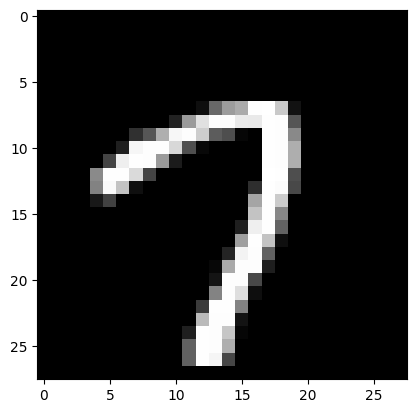

Prediction:  [9]
Label:  9


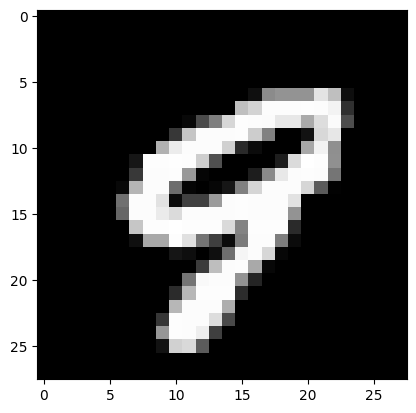

Prediction:  [3]
Label:  8


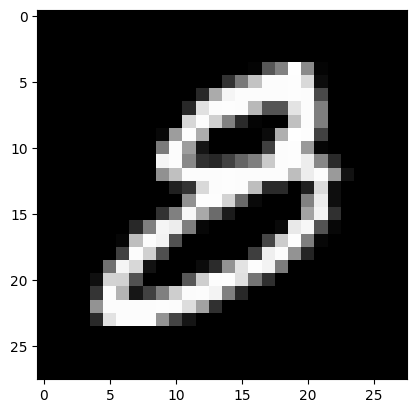

Prediction:  [5]
Label:  3


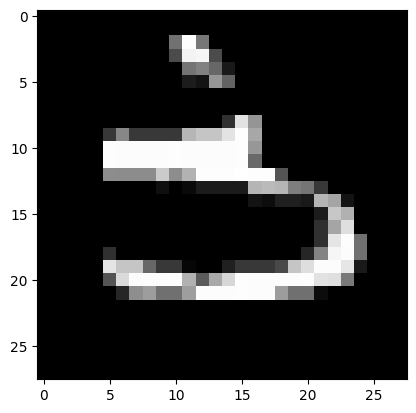

In [36]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [37]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 0 6 0 8 0 1 0 0 5 5 1 3 9 8 9 7 9 9 9 1 8 4 0 6 8 2 8 2 1 1 4 5 1 9 9 3
 2 2 4 6 1 7 6 8 9 7 2 7 3 0 6 3 1 1 2 0 1 5 9 9 9 0 2 8 8 3 4 3 2 8 2 2 9
 4 8 3 1 3 3 5 4 3 8 0 3 9 4 5 7 5 0 6 2 0 9 9 6 8 3 1 7 8 8 4 5 6 0 0 9 8
 7 1 9 8 1 6 0 5 0 6 4 7 1 2 6 3 5 6 5 9 2 4 8 9 9 8 5 6 6 2 1 1 2 9 6 2 6
 1 4 9 3 7 5 6 8 8 2 0 0 3 6 3 8 1 8 8 5 4 8 0 7 9 2 3 8 7 2 1 8 9 3 3 4 9
 9 0 3 2 5 5 2 6 9 6 1 3 1 1 3 3 8 1 6 4 4 6 7 5 1 7 4 1 7 8 1 2 7 1 6 7 7
 7 5 8 3 0 9 1 3 5 0 5 0 4 0 8 0 9 7 9 1 8 3 6 1 0 5 5 5 1 1 8 8 1 6 7 6 5
 5 1 6 7 1 0 5 2 6 0 5 7 6 2 1 6 3 1 1 3 2 1 6 0 0 9 0 3 6 9 8 3 4 0 8 6 4
 0 1 6 8 2 6 4 6 0 3 6 7 7 3 0 9 1 1 3 4 8 0 5 8 3 8 1 3 1 6 0 5 1 2 2 5 0
 1 6 5 9 4 9 0 0 1 4 5 0 6 3 4 4 8 8 6 2 4 9 6 3 9 3 6 3 7 3 6 0 8 0 2 9 4
 6 0 8 1 5 4 3 7 6 3 1 4 2 1 1 4 7 4 5 4 6 6 7 6 0 8 2 3 4 3 5 2 3 4 6 6 9
 4 4 6 5 1 5 7 3 8 4 3 5 9 6 4 3 2 7 7 8 9 7 2 7 0 3 1 4 4 7 6 3 7 5 0 0 1
 2 7 3 4 0 9 0 7 6 9 5 3 6 6 1 8 2 0 6 4 8 4 2 7 2 8 4 8 8 6 2 0 2 1 4 1 6
 7 3 0 8 0 9 4 7 9 2 3 5 

0.871